In [2]:
###XGBoost

import pandas as pd
import numpy as np
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

#Handle Imbalance Data
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [3]:
#Reading our data

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_2 = train[train['bpm']>= -0.6]

In [5]:
test_2018 = test[test['year']==2018]
test_2019 = test[test['year']==2019]

In [6]:
train.columns

Index(['player_name', 'school', 'conference', 'GP', 'Min_per', 'ORtg', 'usg',
       'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM',
       'FTA', 'FT_per', '2PM', '2PA', '2P_per', '3PM', '3PA', '3P_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'rec-rk', 'ast/tov', 'rimmade',
       'rimmade + rimmiss', 'midmade', 'midmade + midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+mismiss)', 'dunksmade',
       'dunksmiss + dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'pos', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'ht_in',
       'drafted', 'yr_cat', 'ATH', 'GP_adj', 'BBIQ'],
      dtype='object')

In [7]:
#stats to look at

per_stats = ['Min_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FT_per', '2P_per', '3P_per', 
             'blk_per', 'stl_per', 'GP', 'TS_per', 'ATH','BBIQ', 'yr_cat']
box_stats = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg','oreb', 'dreb', 'treb',
             'ast', 'stl', 'blk', 'yr_cat', 'FTA', 'FTM', 'ftr', 'ATH', 'BBIQ']
adv_stats = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'dreb', 'treb',
             'ast', 'stl', 'blk', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'FTA', 'FTM', 'ftr',  'ATH', 'BBIQ']

per_adv = ['Min_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FT_per', '2P_per', '3P_per', 
             'blk_per', 'stl_per', 'GP', 'yr_cat', 'bpm', 'obpm', 'dbpm',  'ATH', 'BBIQ']

all_stats = ['GP', 'Min_per', 'ORtg', 'usg',
       'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM',
       'FTA', 'FT_per', '2PM', '2PA', '2P_per', '3PM', '3PA', '3P_per',
       'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe',
       'pfr','year', 'rec-rk', 'ast/tov', 
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'yr_cat', 'ht_in']

accuracy: 0.9881806669480794 recall: 0.11764705882352941 precision: 0.35294117647058826 predictions: 17.0
accuracy: 0.988602785985648 recall: 0.19607843137254902 precision: 0.43478260869565216 predictions: 23.0
accuracy: 0.9911355002110596 recall: 0.3137254901960784 precision: 0.6956521739130435 predictions: 23.0
accuracy: 0.9892359645420008 recall: 0.1568627450980392 precision: 0.5 predictions: 16.0


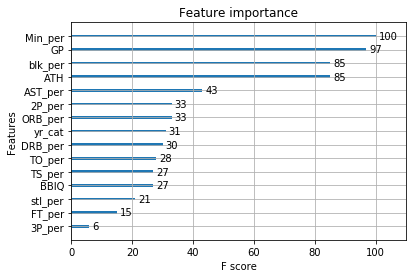

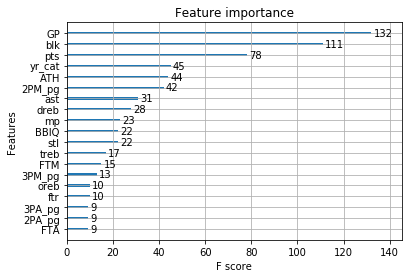

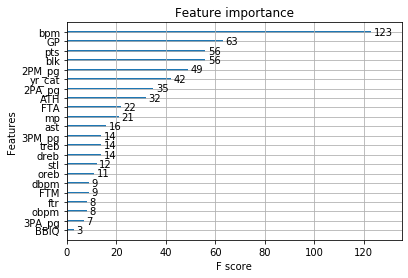

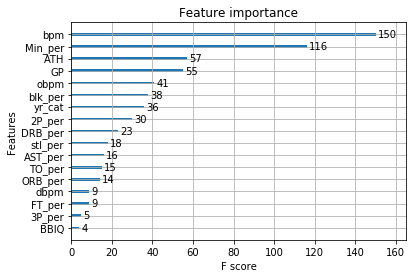

In [25]:
#our preliminary model
tests = [per_stats, box_stats, adv_stats, per_adv]

for i in tests:
    
    model = XGBClassifier()
    model.fit(train[i], train['drafted'])
    y_pred = model.predict(test_2019[i])
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(test_2019['drafted'], predictions)
    recall = recall_score(test_2019['drafted'], predictions)
    precision = precision_score(test_2019['drafted'], predictions)
    print('accuracy: {} recall: {} precision: {} predictions: {}'.format(accuracy, recall, precision, sum(predictions)))
    plot_importance(model)


ROC_AUC: 0.57661784577283 recall: 0.1568627450980392 precision: 0.32 predictions: 25.0
ROC_AUC: 0.5867418014784322 recall: 0.17647058823529413 precision: 0.391304347826087 predictions: 23.0
ROC_AUC: 0.6561159987784319 recall: 0.3137254901960784 precision: 0.6956521739130435 predictions: 23.0
ROC_AUC: 0.616900312503922 recall: 0.23529411764705882 precision: 0.631578947368421 predictions: 19.0


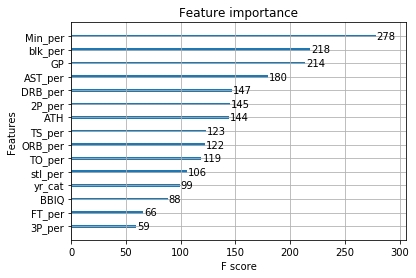

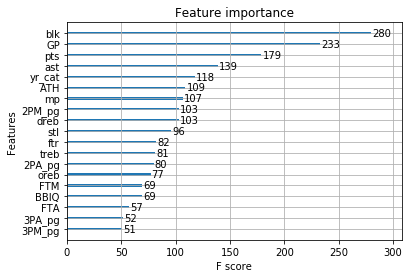

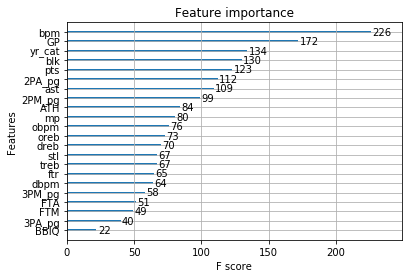

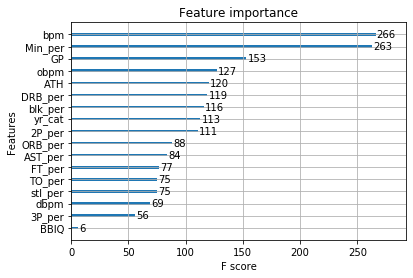

In [36]:
#our preliminary model
tests = [per_stats, box_stats, adv_stats, per_adv]

for i in tests:
    
    model = XGBClassifier(max_depth=5, n_estimator=140)
    model.fit(train[i], train['drafted'])
    y_pred = model.predict(test_2019[i])
    predictions = [round(value) for value in y_pred]

    #accuracy = accuracy_score(test_2018['drafted'], predictions)
    roc_auc = roc_auc_score(test_2019['drafted'], predictions)
    recall = recall_score(test_2019['drafted'], predictions)
    precision = precision_score(test_2019['drafted'], predictions)
    print('ROC_AUC: {} recall: {} precision: {} predictions: {}'.format(roc_auc, recall, precision, sum(predictions)))
    plot_importance(model)
    

In [27]:
#grid search cv
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}



grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(test_2019[adv_stats], test_2019['drafted'])

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   56.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  5.4min finished


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [28]:
print(grid_search)
# summarize the results of the grid search
print(grid_search.best_score_)
print(grid_search.best_params_)

GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)
0.9796689932510827
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 140}


In [29]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 140}

F1: 0.18181818181818182 recall: 0.13725490196078433 precision: 0.2692307692307692 predictions: 26.0
F1: 0.25 recall: 0.17647058823529413 precision: 0.42857142857142855 predictions: 21.0
F1: 0.4 recall: 0.29411764705882354 precision: 0.625 predictions: 24.0
F1: 0.3235294117647059 recall: 0.21568627450980393 precision: 0.6470588235294118 predictions: 17.0


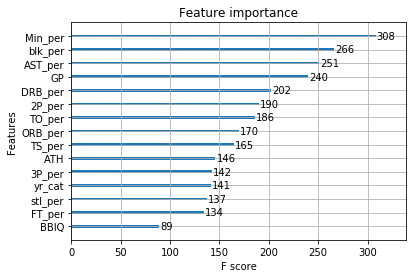

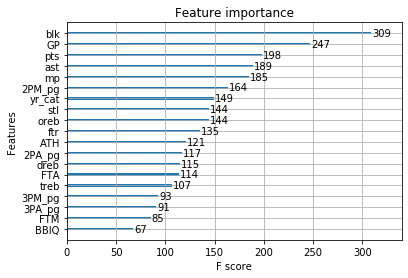

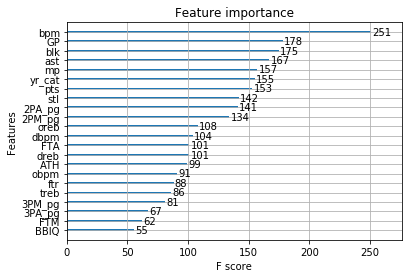

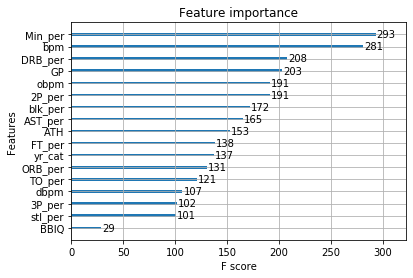

In [10]:
#our preliminary model
tests = [per_stats, box_stats, adv_stats, per_adv]

for i in tests:
    
    model = XGBClassifier(max_depth=5, n_estimators=140)
    model.fit(train_2[i], train_2['drafted'])
    y_pred = model.predict(test_2019[i])
    predictions = [round(value) for value in y_pred]

    F1 = f1_score(test_2019['drafted'], predictions)
    recall = recall_score(test_2019['drafted'], predictions)
    precision = precision_score(test_2019['drafted'], predictions)
    print('F1: {} recall: {} precision: {} predictions: {}'.format(F1, recall, precision, sum(predictions)))
    plot_importance(model)
